## Репликация существующего исследования

**Slav, Maxim; Smyslovskikh, Elena; Novikov, Vladimir; Kolesnikov, Igor; Korotayev, Andrey, 2021**  
[https://doi.org/10.7910/DVN/M4F0CU](https://doi.org/10.7910/DVN/M4F0CU)

**Deprivation, Instability, and Propensity to Attack: How Urbanization Influences Terrorism**

| **Описание**                                                                                           |
|--------------------------------------------------------------------------------------------------------|
| Статья проверяет, как темп урбанизации влияет на террористическую активность                           |

### Информация для каждого наблюдения в массиве данных:

| **Переменная**                | **Описание**                                                                                                           |
|-------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| `c_names`                     | Название государства                                                                                                 |
| `year`                        | Год                                                                                                                   |
| `n_terror_attack`             | Количество терактов за год                                                                                           |
| `nkill`                       | Количество жертв в терактах за год                                                                                   |
| `share_urban_population_UN`   | Доля городского населения по данным ООН                                                                              |
| `population_UN`               | Население по данным ООН                                                                                              |
| `gdp_per_capita_PPP_WB`       | ВВП на душу населения (скорректированный по ППС, данные Всемирного банка)                                            |
| `p_polity_2_2`                | Совокупный индекс Polity 4                                                                                           |
| `epr_discriminated`           | Доля населения, подвергающаяся активной дискриминации с целью исключения из политической власти (0 - нет такой группы)|
| `occupied`                    | Бинарная переменная (0 - регион теракта не находится в оккупации, 1 - присутствует оккупация)                         |
| `war`                         | Бинарная переменная (1 - страна теракта не находится в оккупации, 0 - в государстве идет война)                      |
| `fh_status_sum`               | Совокупный индекс свободы государства (1 - максимальная свобода, 10 - минимальная свобода)                           |
| `state_capacity`              | Индекс государственной состоятельности (минимальное значение -4)                                                    |
| `femaleLF`                    | Доля экономически активного женского населения                                                                       |
| `urb_pop_vigintile`           | Распределение по группам (20 групп) согласно пропорциям городского населения                                         |


In [58]:
import pandas as pd
df = pd.read_csv('ter_urb_data.csv')


**ЗАДАНИЕ: Есть ли отсутствующие (пропущенные) данные? Если да, то в какой колонке их больше всего?**

---



In [48]:
df.describe()

,Unnamed: 0,year,n_terror_attack,n_terror_attack_normalized,nkill,share_urban_population_UN,population_UN,gdp_per_capita_PPP_WB,p_polity_2_2,epr_discriminated,occupied,war,fh_status_sum,SM.POP.REFG,state_capacity,femaleLF,urb_pop_vigintile,p_polity
count,20534.00000,20440.000000,9609.000000,9158.000000,9609.000000,13987.000000,1.398700e+04,8612.000000,8301.000000,10073.000000,11890.000000,7601.000000,7858.000000,4.510000e+03,7601.000000,4413.000000,9157.000000,11890.000000
mean,10267.50000,1973.108953,17.632636,1.144356,42.686856,46.800511,2.516203e+04,14166.671349,0.510782,0.050139,0.030193,0.231417,7.438279,9.241270e+04,-0.013178,51.334088,10.496888,-3.110093
std,5927.79955,28.051554,110.328669,15.171521,349.460474,25.207690,1.024045e+05,17754.318854,7.497038,0.140071,0.171126,0.421766,4.108348,3.543953e+05,0.994472,15.990936,5.764976,18.672823
min,1.00000,1919.000000,0.000000,0.000000,0.000000,1.700000,6.400000e-01,256.166300,-10.000000,0.000000,0.000000,0.000000,2.000000,1.000000e+00,-3.512468,8.026000,1.000000,-88.000000
25%,5134.25000,1951.000000,0.000000,0.000000,0.000000,26.115000,9.200600e+02,2874.419500,-7.000000,0.000000,0.000000,0.000000,3.000000,2.432500e+02,-0.772774,42.242001,5.000000,-7.000000
50%,10267.50000,1975.000000,0.000000,0.000000,0.000000,45.010000,4.646580e+03,7437.643500,0.000000,0.000000,0.000000,0.000000,7.000000,3.804000e+03,-0.083545,51.511002,10.000000,-1.000000
75%,15400.75000,1997.000000,2.000000,0.224186,1.000000,66.990000,1.468619e+04,18311.237253,8.000000,0.016000,0.000000,0.000000,11.000000,3.687175e+04,0.648026,61.228001,15.000000,8.000000
max,20534.00000,2020.000000,3774.000000,1369.863000,13965.000000,100.000000,1.424548e+06,187942.900000,10.000000,0.980000,1.000000,1.000000,14.000000,4.404995e+06,2.861684,90.769997,20.000000,10.000000


In [50]:
df['population_UN'].count()


13987

In [52]:
df['SM.POP.REFG'].count()

4510

Проверить количество пропущенных данных можно через метод .describe(), в строчке count он показывает количество наблюдений, в которых есть данные. Соответственно чем меньше count, тем больше пропущенных данных. Отдельно были посчитаны population_UN и SM.POP.REFG, потому что они странно отобразились в .describe(). Больше всего пропущенных данных оказалось в колонке femaleLF.

**ЗАДАНИЕ: Взглянем на будущую зависимую переменную для модели - n_terror_attack:**


---


   * Выведите топ 5 стран с наибольшим количеством терактов
   * Какое среднее значение количества терактов?

In [54]:
df.groupby(['c_names']).sum().sort_values('n_terror_attack', ascending=False)['n_terror_attack'].head()

c_names
Iraq           23975.0
Pakistan       14147.0
Afghanistan    12404.0
India          11756.0
Colombia        7873.0
Name: n_terror_attack, dtype: float64

In [56]:
df['n_terror_attack'].mean()

17.632636070350713

**ЗАДАНИЕ: Рассмотрим независимую переменную - urb_pop_vigintile:**


---



  * Замените исходные значения переменной на категориальную переменную, принимающую значения от 1 до 3:

  1 : 1–9 значения -- группа 1

  2 : 10–14 значения -- группа 2

  3 : 15–20 - значения --- группа 3

  * C помощью описательных статистик посмотрите, как отличаются выявленные группы?

In [60]:
df.loc[(df['urb_pop_vigintile'] >= 1) & (df['urb_pop_vigintile'] <= 9), 'urb_pop_vigintile'] = 1
df.loc[(df['urb_pop_vigintile'] >= 10) & (df['urb_pop_vigintile'] <= 14), 'urb_pop_vigintile'] = 2
df.loc[(df['urb_pop_vigintile'] >= 15) & (df['urb_pop_vigintile'] <= 20), 'urb_pop_vigintile'] = 3
df['urb_pop_vigintile'] = pd.Categorical(df['urb_pop_vigintile'], [1, 2, 3], ordered=True)
df

,Unnamed: 0,c_names,year,n_terror_attack,n_terror_attack_normalized,nkill,share_urban_population_UN,population_UN,gdp_per_capita_PPP_WB,p_polity_2_2,epr_discriminated,occupied,war,fh_status_sum,SM.POP.REFG,state_capacity,femaleLF,urb_pop_vigintile,p_polity
0,1,United States,1972.0,68.0,0.318722,10.0,73.62,213351.8,27685.88,10.0,0.0,0.0,1.0,2.0,NaN,1.594317,NaN,3,8.0
1,2,United States,1973.0,58.0,0.269431,45.0,73.63,215268.7,28971.10,10.0,0.0,0.0,1.0,2.0,NaN,1.634505,NaN,3,8.0
2,3,United States,1974.0,86.0,0.395915,16.0,73.64,217218.4,28552.43,10.0,0.0,0.0,1.0,2.0,NaN,1.676129,NaN,3,10.0
3,4,United States,1975.0,142.0,0.647795,24.0,73.65,219205.3,28214.20,10.0,0.0,0.0,0.0,2.0,NaN,1.637376,NaN,3,10.0
4,5,United States,1976.0,98.0,0.442960,4.0,73.66,221239.2,29453.21,10.0,0.0,0.0,0.0,2.0,NaN,1.716317,NaN,3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20529,20530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20530,20531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20531,20532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20532,20533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.groupby('urb_pop_vigintile')['urb_pop_vigintile'].describe()

/var/folders/mn/w8y7qrc94fj3v9x9ny9klcz40000gn/T/ipykernel_32168/1313981267.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('urb_pop_vigintile')['urb_pop_vigintile'].describe()


,count,unique,top,freq
urb_pop_vigintile,,,,
1,4122,1,1,4122
2,2290,1,2,2290
3,2745,1,3,2745


В первой группе наибольшее количество значений, а во второй наименьшее, третья по количеству значений находится между ними

**ЗАДАНИЕ: отфильтруйте массив данных таким образом, чтобы в стране точно был хотя бы один теракт в год, на котором был убит хотя бы один человек. Далее необходимо использовать этот отфильтрованный массив для выполнения всех последующих заданий. Если в дальнейшем задания будут выполнены с использованием другой фильтрации, результат будет оцениваться с пониженным коэффициентом 0.5.**


---




In [62]:
df = df[(df['n_terror_attack'] >= 1) & (df['nkill'] >= 1)]
df

,Unnamed: 0,c_names,year,n_terror_attack,n_terror_attack_normalized,nkill,share_urban_population_UN,population_UN,gdp_per_capita_PPP_WB,p_polity_2_2,epr_discriminated,occupied,war,fh_status_sum,SM.POP.REFG,state_capacity,femaleLF,urb_pop_vigintile,p_polity
0,1,United States,1972.0,68.0,0.318722,10.0,73.62,213351.80,27685.880,10.0,0.0,0.0,1.0,2.0,NaN,1.594317,NaN,3,8.0
1,2,United States,1973.0,58.0,0.269431,45.0,73.63,215268.70,28971.100,10.0,0.0,0.0,1.0,2.0,NaN,1.634505,NaN,3,8.0
2,3,United States,1974.0,86.0,0.395915,16.0,73.64,217218.40,28552.430,10.0,0.0,0.0,1.0,2.0,NaN,1.676129,NaN,3,10.0
3,4,United States,1975.0,142.0,0.647795,24.0,73.65,219205.30,28214.200,10.0,0.0,0.0,0.0,2.0,NaN,1.637376,NaN,3,10.0
4,5,United States,1976.0,98.0,0.442960,4.0,73.66,221239.20,29453.210,10.0,0.0,0.0,0.0,2.0,NaN,1.716317,NaN,3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19146,19147,Yugoslavia,1973.0,1.0,NaN,1.0,NaN,NaN,NaN,-7.0,0.0,0.0,0.0,12.0,NaN,0.149404,NaN,NaN,-7.0
19150,19151,Yugoslavia,1977.0,1.0,NaN,1.0,NaN,NaN,NaN,-7.0,0.0,0.0,0.0,11.0,NaN,0.047211,NaN,NaN,-7.0
19156,19157,Yugoslavia,1983.0,1.0,NaN,2.0,NaN,NaN,NaN,-5.0,0.0,0.0,0.0,11.0,NaN,0.261931,NaN,NaN,-5.0
19157,19158,Yugoslavia,1984.0,1.0,NaN,2.0,NaN,NaN,NaN,-5.0,0.0,0.0,0.0,11.0,NaN,-0.057996,NaN,NaN,-5.0


**ЗАДАНИЕ: Проверьте знакомым Вам способом, различаются ли средние значения количества убитых в терактах между странами, где идет оккуппация, и относительно свободных странах (нет оккупации)**

---



In [64]:
df.groupby('occupied')['nkill'].describe()

,count,mean,std,min,25%,50%,75%,max
occupied,,,,,,,,
0.0,2326.0,151.079536,652.464090,1.0,2.0,11.0,64.0,13965.0
1.0,137.0,426.211679,951.376398,1.0,12.0,61.0,295.0,6667.0


In [66]:
from scipy import stats
not_occupied = df[df['occupied'] == 0]['nkill']
occupied = df[df['occupied'] == 1]['nkill']
stats.ttest_ind(not_occupied, occupied)

TtestResult(statistic=-4.653800961851815, pvalue=3.431548757473189e-06, df=2461.0)

***ОТВЕТ***
Разница в средних примерно равна ~275, но при этом нам нужно убедиться в статистической значимости этой разницы, тем более размеры выборок очень сильно разнятся. Поэтому был проведент т-тест, показавший т-статистику 4.65, что явно попадает в критическую зону и говорит о наличии статистической разницы между средними. 

**ЗАДАНИЕ: Визуализация взаимосвязей между переменными**

---



Постройте две диаграммы рассеяния для анализа взаимосвязи между следующими парами переменных:

***Диаграмма 1:***

***Ось X:*** gdp_per_capita_PPP_WB (ВВП на душу населения по данным Всемирного банка, скорректированный по паритету покупательной способности).

***Ось Y:*** n_terror_attack (количество террористических атак за год).


***Диаграмма 2:***

***Ось X:*** epr_discriminated (доля населения, подвергающаяся активной дискриминации).

***Ось Y: ***n_terror_attack (количество террористических атак за год).
Цель:
Проанализируйте возможные закономерности или тренды, которые могут свидетельствовать о зависимости между переменными.

***Требования к визуализации:***

* Подпишите оси для каждой диаграммы.
* Добавьте заголовок для каждой диаграммы, кратко описывающий содержимое.
* Убедитесь, что графики читаемы и оформлены аккуратно.

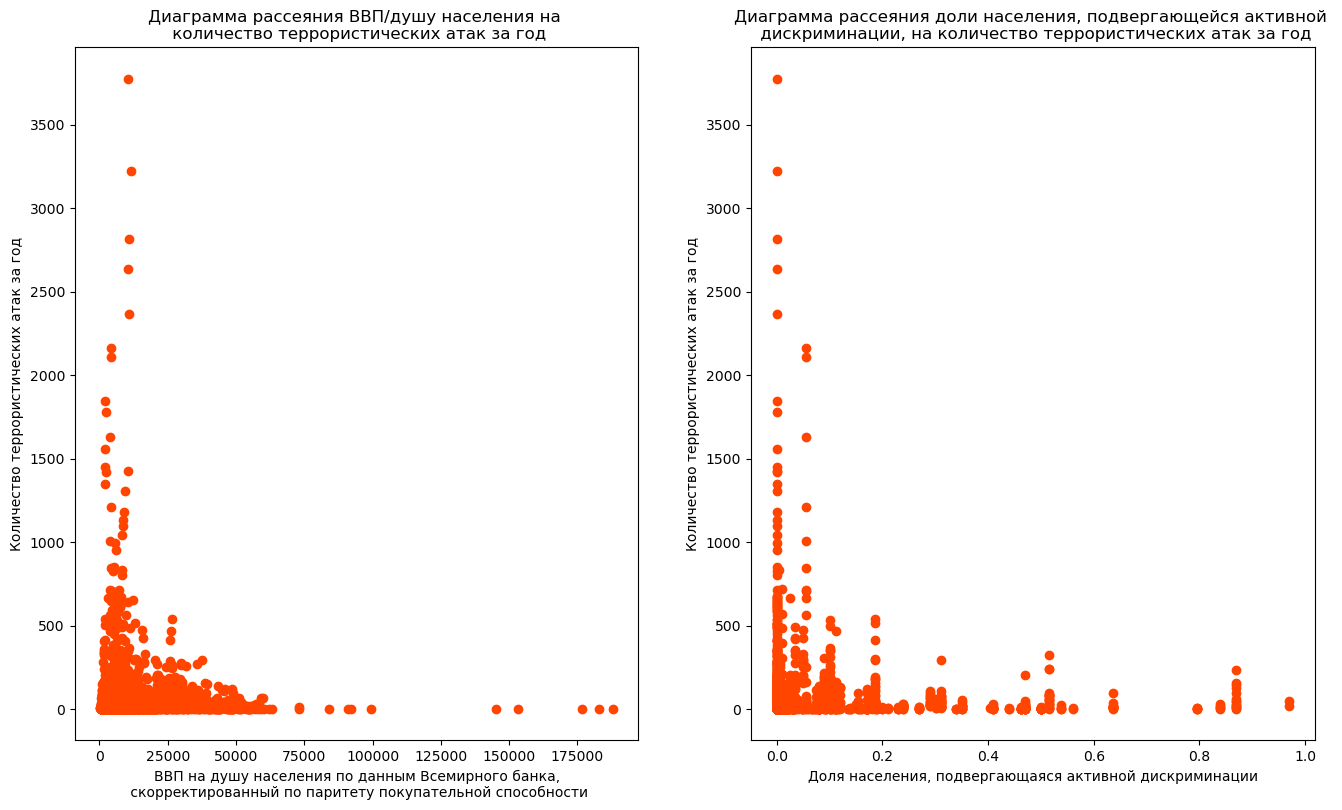

In [68]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 9));

axes[0].scatter(df['gdp_per_capita_PPP_WB'], df['n_terror_attack'], color = "orangered");
axes[0].set_xlabel('ВВП на душу населения по данным Всемирного банка,\n скорректированный по паритету покупательной способности');
axes[0].set_ylabel('Количество террористических атак за год');
axes[0].title.set_text('Диаграмма рассеяния ВВП/душу населения на \n количество террористических атак за год')

axes[1].scatter(df['epr_discriminated'], df['n_terror_attack'], color = "orangered");
axes[1].set_xlabel('Доля населения, подвергающаяся активной дискриминации');
axes[1].set_ylabel('Количество террористических атак за год');
axes[1].title.set_text('Диаграмма рассеяния доли населения, подвергающейся активной \n дискриминации, на количество террористических атак за год')

 **ЗАДАНИЕ: Постройте модель регрессии, используя следующие переменные. Укажите, есть ли между переменными линейная зависимость.**


---



*** Зависимая переменная: ***
 `n_terror_attack` - количество терактов в год

***Независимые переменные: ***
  * Количество убитых `nkill`
  * ВВП на душу населения (скорректированный по ППС, данные Всемирного банкa `gdp_per_capita_PPP_WB `
  * Совокупный индекс Polity 4 `p_polity_2_2`
  * Доля населения, подвергающаяся активной дискриминации с целью исключения из политической власти  `epr_discriminated`
  * Бинарная переменная (0 - регион теракта не находится в оккупации, 1 - присутствует оккупация) `occupied`
  * Бинарная переменная (1 - страна теракта не находится в оккупации, 0 - в государстве идет война) `war`
  * Индекс государственной состоятельности (минимальное значение -4) `state_capacity`
  * Доля экономически активного женского населения `femaleLF`
  * `urb_pop_vigintile` - данные по групппам (1-ая,2-ая и 3-я группа, которые были созданы ранее)


In [74]:
from statsmodels.formula.api import ols
model = ols('n_terror_attack ~ nkill + gdp_per_capita_PPP_WB + p_polity_2_2 + epr_discriminated + occupied + war + state_capacity + femaleLF + urb_pop_vigintile', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        n_terror_attack   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     78.60
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          1.06e-117
Time:                        03:29:18   Log-Likelihood:                -5316.0
No. Observations:                 979   AIC:                         1.065e+04
Df Residuals:                     968   BIC:                         1.071e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 41.6678      7.197      5.790      0.000      27.544      55.791
urb_pop_vigintile[T.2]    -6.6409      5.299     -1.253      0.210     -17.039       3.758
urb_pop_vigintile[T.3]    12.8247      6.458      1.986      0.047       0.151      25.499
nkill                      0.1550      0.007     21.062      0.000       0.141       0.169
gdp_per_capita_PPP_WB     -0.0013      0.000     -5.344      0.000      -0.002      -0.001
p_polity_2_2               1.7252      0.338      5.098      0.000       1.061       2.389
epr_discriminated        -22.4478     14.023     -1.601      0.110     -49.966       5.070
occupied                  -6.4919     15.855     -0.409      0.682     -37.606      24.622
war                       17.5381      3.890      4.509      0.000       9.905      25.171
state_capacity            15.6967      3.568      4.400      0.000       8.695      22.698
femaleLF                  -0.4002      0.106     -3.782      0.000      -0.608      -0.193
==============================================================================
Omnibus:                      639.575   Durbin-Watson:                   1.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26769.407
Skew:                           2.390   Prob(JB):                         0.00
Kurtosis:                      28.167   Cond. No.                     1.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**ЗАДАНИЕ: Выведите регрессионное уравнение для модели выше. Укажите, коэффициенты каких переменных значимы? Как Вы это определили?**

In [76]:
coefficients = model.params
equation = f"price = {coefficients['Intercept']:.4f} "
for variable in coefficients.index[1:]:
    equation += f"+ {coefficients[variable]:.4f} * {variable} "
print(equation)

price = 41.6678 + -6.6409 * urb_pop_vigintile[T.2] + 12.8247 * urb_pop_vigintile[T.3] + 0.1550 * nkill + -0.0013 * gdp_per_capita_PPP_WB + 1.7252 * p_polity_2_2 + -22.4478 * epr_discriminated + -6.4919 * occupied + 17.5381 * war + 15.6967 * state_capacity + -0.4002 * femaleLF 


***ОТВЕТ***
Значимые переменные: Intercept, urb_pop_vigintile[T.3], nkill, gdp_per_capita_PPP_WB, p_polity_2_2, war, state_capacity, femaleLF 
Определить можно по доверительным интервалам (они для этих переменных не накрывают ноль), по p-value (меньше 0.05 для уровня доверия 95%), по t-статистике (по модулю больше 1.96)

**ЗАДАНИЕ: Что означает константа в данной регресионной модели? Чему равен R-squared модели?**

Константа означает, что в первой группе переменной urb_pop_vigintile при всех остальных независимых переменных равных нулю количество террактов за год будет равно ~41.67. R-squared равен 0.448, что является довольно большим (для исследований) значением.

**ЗАДАНИЕ:Добавьте в предыдущее регрессионное уравнение переменную взаимодействия количества убитых во 
время террактов (n_kill) и наличия войны на территории гос-ва (war). Выведите новое регрессионное 
уравнение. Изменилась ли значимость коэффициентов при добавлении переменной взаимодействия? 
Посчитайте предельный эффект изменения количества террактов в государствах, в которых идет война, и нет. Укажите ответ**

In [78]:
model2 = ols('n_terror_attack ~ nkill + gdp_per_capita_PPP_WB + p_polity_2_2 + epr_discriminated + occupied + war + state_capacity + femaleLF + urb_pop_vigintile + nkill:war', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        n_terror_attack   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     85.48
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          2.32e-134
Time:                        03:31:17   Log-Likelihood:                -5274.5
No. Observations:                 979   AIC:                         1.057e+04
Df Residuals:                     967   BIC:                         1.063e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 29.8651      7.019      4.255      0.000      16.091      43.639
urb_pop_vigintile[T.2]    -4.3129      5.088     -0.848      0.397     -14.297       5.671
urb_pop_vigintile[T.3]    16.4335      6.206      2.648      0.008       4.255      28.612
nkill                      0.4867      0.037     13.320      0.000       0.415       0.558
gdp_per_capita_PPP_WB     -0.0012      0.000     -5.018      0.000      -0.002      -0.001
p_polity_2_2               1.7242      0.325      5.313      0.000       1.087       2.361
epr_discriminated        -29.8460     13.471     -2.216      0.027     -56.282      -3.410
occupied                  -8.3837     15.206     -0.551      0.582     -38.224      21.457
war                       28.0789      3.900      7.199      0.000      20.425      35.733
state_capacity            13.1916      3.432      3.844      0.000       6.456      19.927
femaleLF                  -0.3657      0.102     -3.601      0.000      -0.565      -0.166
nkill:war                 -0.3439      0.037     -9.251      0.000      -0.417      -0.271
==============================================================================
Omnibus:                      594.151   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18675.959
Skew:                           2.229   Prob(JB):                         0.00
Kurtosis:                      23.928   Cond. No.                     1.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
coefficients2 = model2.params
equation2 = f"price = {coefficients2['Intercept']:.4f} "
for variable in coefficients2.index[1:]:
    equation2 += f"+ {coefficients2[variable]:.4f} * {variable} "
print(equation2)

price = 29.8651 + -4.3129 * urb_pop_vigintile[T.2] + 16.4335 * urb_pop_vigintile[T.3] + 0.4867 * nkill + -0.0012 * gdp_per_capita_PPP_WB + 1.7242 * p_polity_2_2 + -29.8460 * epr_discriminated + -8.3837 * occupied + 28.0789 * war + 13.1916 * state_capacity + -0.3657 * femaleLF + -0.3439 * nkill:war 


***ОТВЕТ***
Переменная war стала более значимой, а переменная nkil менее, но при этом они как были значимыми так и остались.
Переменная epr_discriminated стала статистически значимой на уровне 0.95. Переменная взаимодействия, мы добавили, тоже значима, но на уровне 0.99.

***ОТВЕТ*** Предельный эффект переменной nkill(если в условии имелась ввиду именно она) в странах где идет война E(n_terror_attack|nkill)' = 0.4867 - 0.3439 * nkill:war = 0.4867 - 0.3439 * 1 = 0.4867 - 0.3439 = 0.1428. В странах где война не идет предельный эффект будет равен: 0.4867 - 0.3439 * 0 = 0.4867 - 0 = 0.4867

In [1]:
0.4867 - 0.3439

0.14280000000000004